In [1]:
catalog

In [2]:
dataset = catalog.load("dataset")

[06/12/23 22:46:02] INFO     Loading data from 'dataset' (PickleDataSet)...                     ]8;id=379071;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=474154;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

[06/12/23 22:46:28] INFO     Loading data from 'dataset' (PickleDataSet)...                     ]8;id=420917;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=16976;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

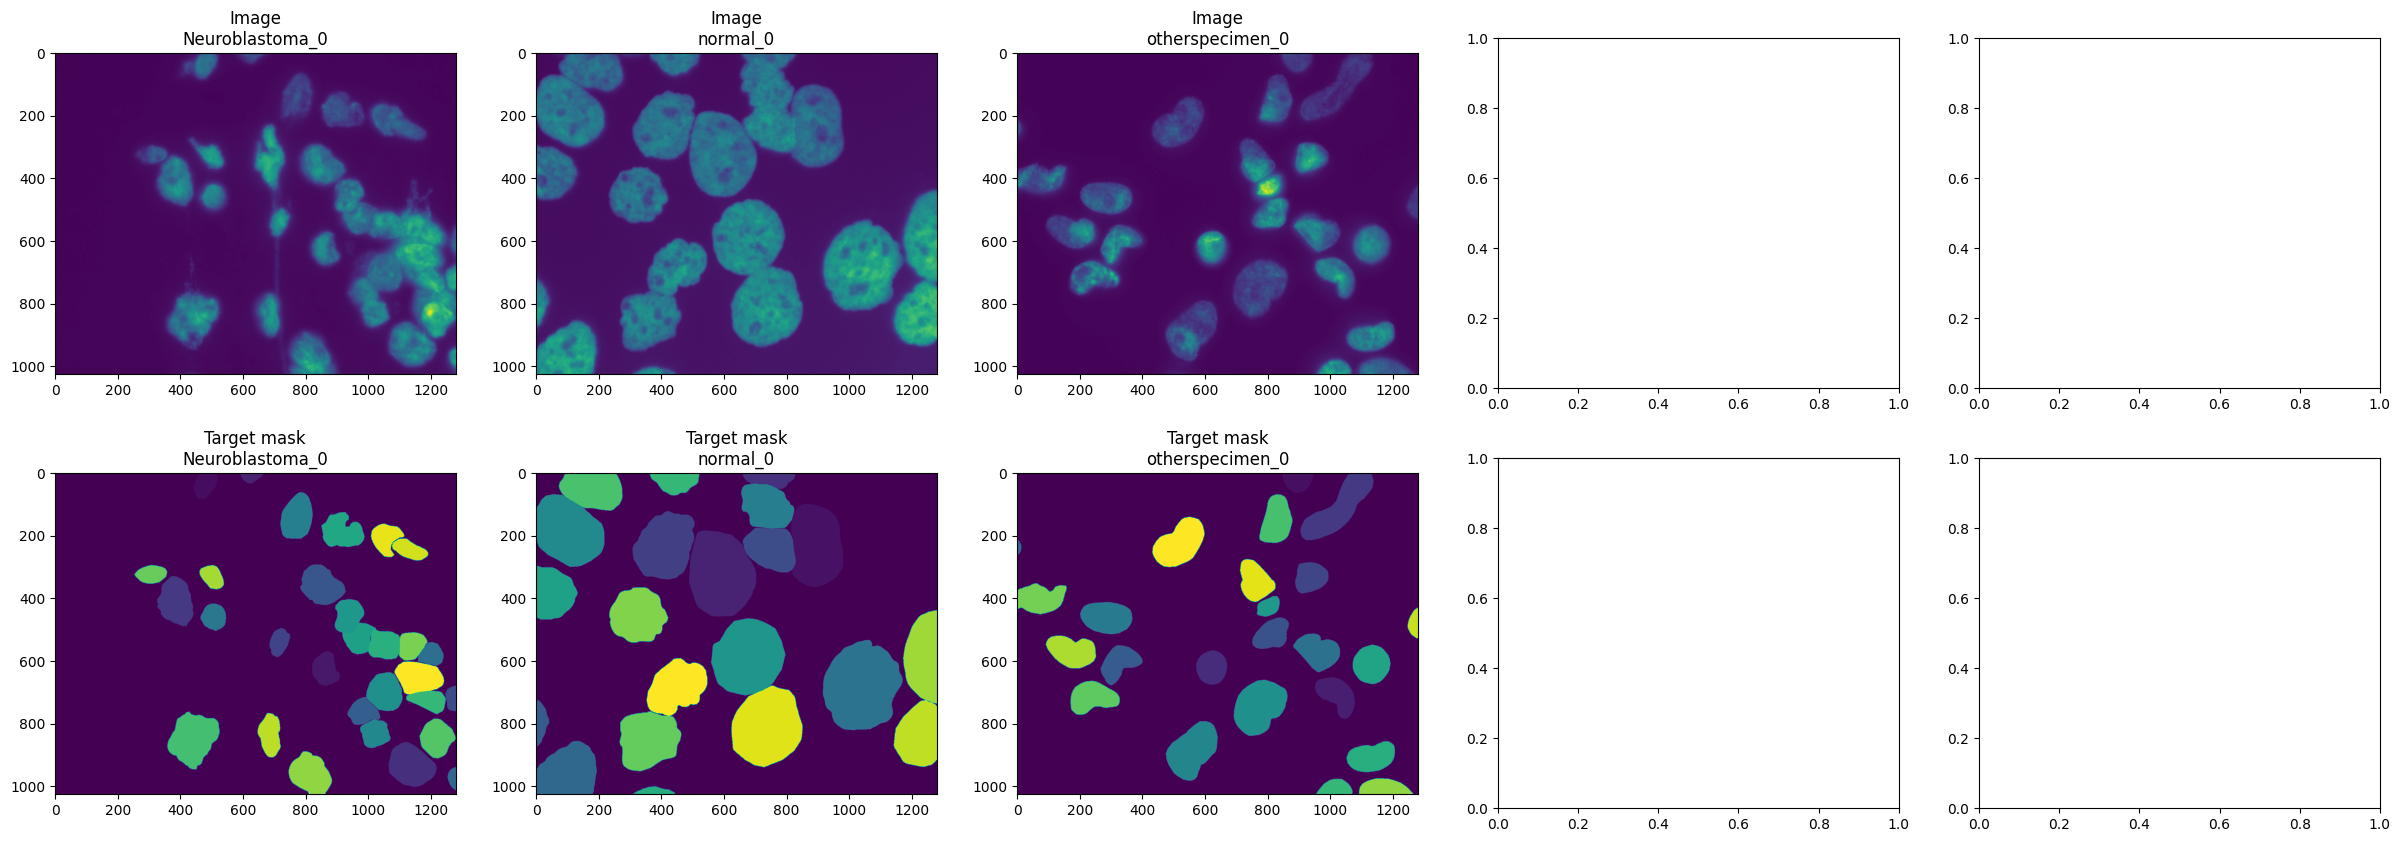

In [4]:
dataset = catalog.load("dataset")

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

take_n_every = 1

for j in range(3):
        axes[0][j].imshow(np.transpose(dataset[j*take_n_every][0], (1, 2, 0)))
        axes[0][j].set_title('Image\n' + dataset.get_image_name(j*take_n_every))
        axes[1][j].imshow(np.transpose(dataset[j*take_n_every][1], (1, 2, 0)))
        axes[1][j].set_title('Target mask\n' + dataset.get_target_name(j*take_n_every))


In [1]:
import cv2
import numpy as np

def get_countours(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    image_uint8 = image.astype(np.uint8)

    to_extract = np.unique(image)
    print("Number of contours detected:",len(to_extract))

    all_contours = []

    for i in range(1, len(to_extract)):
        _, thresh = cv2.threshold((image_uint8 == i).astype(np.uint8), 0, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contours = [cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True) for cnt in contours]
        all_contours.extend(contours)


    image = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
    image = cv2.drawContours(image, all_contours, -1, (0,255,255), 2)

    cv2.imshow("Polygon", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return all_contours

get_countours('/home/pslowiq/Downloads/S-BSST265/dataset/groundtruth/Neuroblastoma_0.tif')

Number of contours detected: 31
[0 1]
[array([[[507,   0]],

       [[466,   0]],

       [[452,  17]],

       [[441,  44]],

       [[448,  59]],

       [[448,  70]],

       [[460,  82]],

       [[480,  81]],

       [[513,  41]],

       [[519,  12]]], dtype=int32)]
[0 1]
[array([[[874, 569]],

       [[864, 569]],

       [[836, 587]],

       [[820, 616]],

       [[825, 647]],

       [[840, 670]],

       [[857, 677]],

       [[880, 674]],

       [[904, 662]],

       [[909, 649]],

       [[894, 624]],

       [[889, 578]]], dtype=int32)]
[0 1]
[array([[[590,   1]],

       [[603,  23]],

       [[616,  32]],

       [[626,  33]],

       [[659,  11]],

       [[667,   0]]], dtype=int32)]
[0 1]
[array([[[1104,  862]],

       [[1075,  885]],

       [[1065,  927]],

       [[1071,  960]],

       [[1112,  993]],

       [[1141, 1000]],

       [[1171,  995]],

       [[1200,  976]],

       [[1216,  951]],

       [[1214,  928]],

       [[1148,  870]],

       [[1124,  85

[array([[[507,   0]],
 
        [[466,   0]],
 
        [[452,  17]],
 
        [[441,  44]],
 
        [[448,  59]],
 
        [[448,  70]],
 
        [[460,  82]],
 
        [[480,  81]],
 
        [[513,  41]],
 
        [[519,  12]]], dtype=int32),
 array([[[874, 569]],
 
        [[864, 569]],
 
        [[836, 587]],
 
        [[820, 616]],
 
        [[825, 647]],
 
        [[840, 670]],
 
        [[857, 677]],
 
        [[880, 674]],
 
        [[904, 662]],
 
        [[909, 649]],
 
        [[894, 624]],
 
        [[889, 578]]], dtype=int32),
 array([[[590,   1]],
 
        [[603,  23]],
 
        [[616,  32]],
 
        [[626,  33]],
 
        [[659,  11]],
 
        [[667,   0]]], dtype=int32),
 array([[[1104,  862]],
 
        [[1075,  885]],
 
        [[1065,  927]],
 
        [[1071,  960]],
 
        [[1112,  993]],
 
        [[1141, 1000]],
 
        [[1171,  995]],
 
        [[1200,  976]],
 
        [[1216,  951]],
 
        [[1214,  928]],
 
        [[1148,  870]],
 
   

In [11]:
import mmcv
import numpy as np
from mmdet.apis import init_detector, inference_detector
from mmengine.visualization import Visualizer
from mmcv.transforms import Compose
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector, inference_detector

def evaluate(images, config):
    

    for image_name in images:
        img = np.array(images[image_name]())
        break
    img = mmcv.imread('/home/pslowiq/programs/dl-cell-nuclei-segmentation/data/01_raw/dataset/train/Ganglioneuroblastoma_0.tif')
    checkpoint_file = './tutorial_exps/epoch_12.pth'
    model = init_detector(config, checkpoint_file, device='cuda')
    new_result = inference_detector(model, img)

    # get built visualizer
    visualizer_now = Visualizer.get_instance(name = 'x')
    # the dataset_meta is loaded from the checkpoint and
    # then pass to the model in init_detector
    visualizer_now.dataset_meta = model.dataset_meta
    # show the results
    visualizer_now.add_datasample(
        'new_result',
        img,
        data_sample=new_result,
        draw_gt=False,
        wait_time=0,
        show = True,
        #pred_score_thr=0.5
    )
    visualizer_now.set_image(img)
    print(visualizer_now)
    visualizer_now.show()

    return 0

[06/15/23 00:41:38] INFO     Loading data from 'mask_rcnn_config' (PickleDataSet)...            ]8;id=634180;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=856771;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

Loads checkpoint by local backend from path: ../tutorial_exps/epoch_10.pth


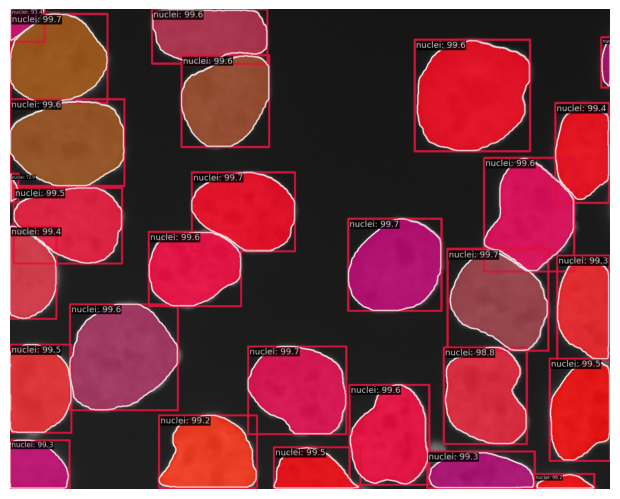

In [12]:
import mmcv
import numpy as np
from mmdet.apis import init_detector, inference_detector
from mmengine.visualization import Visualizer
from mmcv.transforms import Compose
from mmdet.registry import VISUALIZERS
from mmdet.utils import register_all_modules
from mmdet.apis import init_detector, inference_detector

img = mmcv.imread('/home/pslowiq/programs/dl-cell-nuclei-segmentation/data/01_raw/dataset/train/normal_1.tif')
config = catalog.load("mask_rcnn_config")
checkpoint_file = '../tutorial_exps/epoch_10.pth'
model = init_detector(config, checkpoint_file, device='cpu')
result = inference_detector(model, img)

# get built visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')

visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True)

# Test a video and show the results
# Build test pipeline
model.cfg.test_dataloader.dataset.pipeline[0].type = 'LoadImageFromNDArray'
test_pipeline = Compose(model.cfg.test_dataloader.dataset.pipeline)

# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta
visualizer.show()